In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
IRRADIANCE_1 = 900
IRRADIANCE_2 = 600
IRRADIANCE_3 = 300
TEMPERATURE_1 = 25
TEMPERATURE_2 = 22
TEMPERATURE_3 = 18

pvsyss = ShadedArray.get_default_array()

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_1, ] * 4,
    ambient_temperature=[TEMPERATURE_1, ] * 4,
)
uniform_curve_1 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_1 = pvsyss.power(uniform_curve_1.voltage, uniform_curve_1.current)
mpp_1 = pvsyss.mpp_from_curve(uniform_curve_1)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_2, ] * 4,
    ambient_temperature=[TEMPERATURE_2, ] * 4,
)
uniform_curve_2 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_2 = pvsyss.power(uniform_curve_2.voltage, uniform_curve_2.current)
mpp_2 = pvsyss.mpp_from_curve(uniform_curve_2)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_3, ] * 4,
    ambient_temperature=[TEMPERATURE_3, ] * 4,
)
uniform_curve_3 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_3 = pvsyss.power(uniform_curve_3.voltage, uniform_curve_3.current)
mpp_3 = pvsyss.mpp_from_curve(uniform_curve_3)


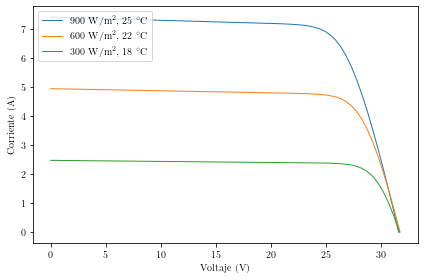

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")

# Plot I-V curves
# dashes = (line size, space size)
ax.plot(uniform_curve_1.voltage, uniform_curve_1.current, linewidth=1.0, label=f'{IRRADIANCE_1} $\mathrm{{W/m^2}}$, {TEMPERATURE_1} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_2.voltage, uniform_curve_2.current, linewidth=1.0, label=f'{IRRADIANCE_2} $\mathrm{{W/m^2}}$, {TEMPERATURE_2} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_3.voltage, uniform_curve_3.current, linewidth=1.0, label=f'{IRRADIANCE_3} $\mathrm{{W/m^2}}$, {TEMPERATURE_3} $^\circ \mathrm{{C}}$')

ax.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_05_iv_curve.pdf', bbox_inches='tight')